In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.tumour import TumourSimParameters, TumourSimulator
import matplotlib.pyplot as plt

In [4]:
import numpy as np

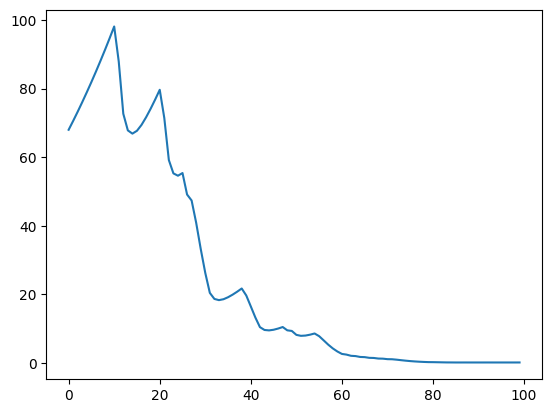

In [ ]:
params = TumourSimParameters(initial_d=5, rho=0.00723)

simulator = TumourSimulator(params=params)

# Simulate trajectory
trajectory = simulator.simulate_trajectory(num_steps=100)

# Print example note
# print(trajectory["notes"][0])

plt.plot(trajectory["time"], trajectory["volume"])
plt.show()

In [35]:
# https://seer.cancer.gov/data/
# https://www.cdc.gov/united-states-cancer-statistics/dataviz/index.html

distribution = {
    (18, 24): 0.3,
    (25, 29): 0.5,
    (30, 34): 1.0,
    (35, 39): 2.5,
    (40, 44): 5.5,
    (45, 49): 14.2,
    (50, 54): 33.2,
    (55, 59): 79.9,
    (60, 64): 140.5,
    (65, 69): 198.4,
    (70, 74): 262.8,
    (75, 79): 334.7,
    (80, 84): 332,
    (85, 100): 224.1,
}

In [45]:
def generate_ages(n_patients: int, age_distribution: dict) -> list:
    # Calculate number of patients for each age group
    patient_counts = {
        age_range: int(np.round(proportion * n_patients))
        for age_range, proportion in age_distribution.items()
    }

    # Generate ages for each group
    ages = []
    for (min_age, max_age), count in patient_counts.items():
        # Generate uniform random ages within the range
        group_ages = np.random.choice(range(min_age, max_age + 1), count)
        # Round to nearest integer
        group_ages = np.round(group_ages).astype(int)
        ages.extend(group_ages)

    return sorted(ages)

In [46]:
{k: v / sum(distribution.values()) for k, v in distribution.items()}

{(18, 49): 0.02482621648460775,
 (50, 54): 0.0198609731876862,
 (55, 59): 0.04865938430983119,
 (60, 64): 0.08540218470705065,
 (65, 69): 0.1201588877855015,
 (70, 74): 0.1598808341608739,
 (75, 79): 0.20357497517378353,
 (80, 84): 0.20158887785501492,
 (85, 90): 0.13604766633565046}

In [47]:
# Generate ages for 1000 patients
ages = generate_ages(1000, distribution)

# Print some basic statistics
print(f"Total patients: {len(ages)}")
print(f"Age range: {min(ages)} - {max(ages)}")
print(f"Mean age: {np.mean(ages):.1f}")
print(f"Median age: {np.median(ages)}")

# Print distribution verification
print("\nActual distribution:")
for min_age, max_age in distribution.keys():
    count = sum(1 for age in ages if min_age <= age <= max_age)
    actual_prop = count / len(ages)
    expected_prop = distribution[(min_age, max_age)]
    print(f"Age {min_age}-{max_age}: {actual_prop:.3f} (Expected: {expected_prop:.3f})")

Total patients: 1007
Age range: 18 - 90
Mean age: 73.5
Median age: 76.0

Actual distribution:
Age 18-49: 0.025 (Expected: 0.025)
Age 50-54: 0.020 (Expected: 0.020)
Age 55-59: 0.049 (Expected: 0.049)
Age 60-64: 0.085 (Expected: 0.086)
Age 65-69: 0.120 (Expected: 0.121)
Age 70-74: 0.160 (Expected: 0.161)
Age 75-79: 0.204 (Expected: 0.205)
Age 80-84: 0.202 (Expected: 0.203)
Age 85-90: 0.136 (Expected: 0.137)


(array([  3.,   6.,   4.,   1.,   3.,   3.,   3.,   2.,   4.,  12.,  30.,
         64.,  45., 101.,  81., 139., 166., 130., 120.,  90.]),
 array([18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6, 43.2, 46.8, 50.4, 54. ,
        57.6, 61.2, 64.8, 68.4, 72. , 75.6, 79.2, 82.8, 86.4, 90. ]),
 <BarContainer object of 20 artists>)

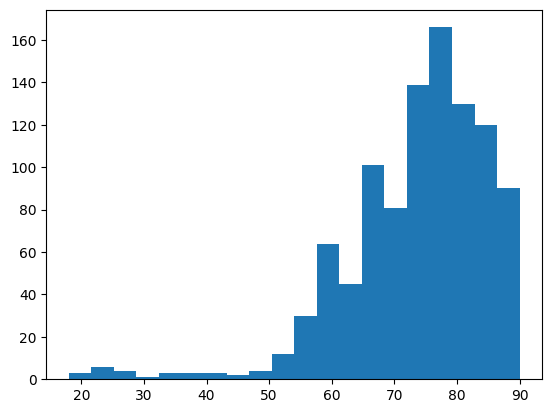

In [52]:
import matplotlib.pyplot as plt

plt.hist(ages, bins=20)

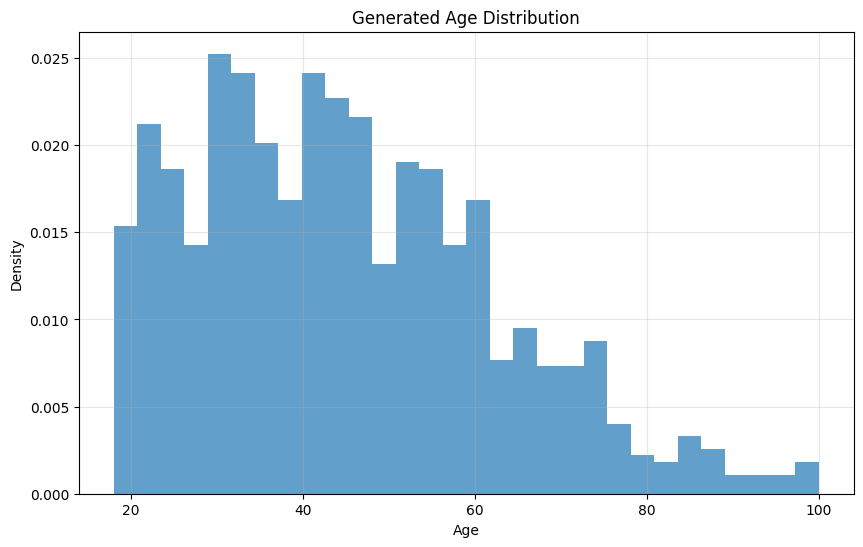

Mean age: 44.9
Median age: 43.0
Age range: 18 - 100


In [ ]:
import numpy as np
from scipy.stats import gamma, norm


def age_distribution_function(x):
    # x is age
    # Returns relative probability density at that age

    # Parameters for the mixture
    gamma_shape = 2.5
    gamma_scale = 20
    norm_loc = 45
    norm_scale = 20

    # Combine gamma (for younger population) and normal (for middle-aged bulk)
    # Then multiply by survival function (decreasing exponential) for elderly
    young_mid = 0.6 * gamma.pdf(x, a=gamma_shape, scale=gamma_scale) + 0.4 * norm.pdf(
        x, loc=norm_loc, scale=norm_scale
    )

    # Survival decay for older ages
    survival_decay = np.exp(-0.02 * np.maximum(x - 60, 0))

    return young_mid * survival_decay


# Generate sample ages
def generate_population_ages(n_samples, min_age=18, max_age=100):
    # Create age range for sampling
    ages = np.linspace(min_age, max_age, 1000)
    probs = age_distribution_function(ages)

    # Normalize probabilities
    probs = probs / np.sum(probs)

    # Sample ages
    sampled_ages = np.random.choice(ages, size=n_samples, p=probs)
    return np.round(sampled_ages).astype(int)


# Test it
ages = generate_population_ages(1000)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=30, density=True, alpha=0.7)
plt.title("Generated Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Mean age: {np.mean(ages):.1f}")
print(f"Median age: {np.median(ages):.1f}")
print(f"Age range: {min(ages)} - {max(ages)}")

In [ ]:
distribution = {
    (18, 24): 0.3,
    (25, 29): 0.5,
    (30, 34): 1.0,
    (35, 39): 2.5,
    (40, 44): 5.5,
    (45, 49): 14.2,
    (50, 54): 33.2,
    (55, 59): 79.9,
    (60, 64): 140.5,
    (65, 69): 198.4,
    (70, 74): 262.8,
    (75, 79): 334.7,
    (80, 84): 332,
    (85, 100): 224.1,
}

In [ ]:
0.07 / 100

0.0007000000000000001

five cohorts of patients
- if further cancer diagnosis is required, all patients will return again in 0.5 months
- pneuomnia / bronchitis patients (50%) will visit the hospital twice only, once on first presentation and follow up to show that it's resolved
- bronchiectasis patients will present will visit the hospital twice a year
- cancer patients will present at index event, and follow up if diagnosed positive or return again in 3 months if negative

metric: we want to identify whether diagnosis is delayed

Overall Population Statistics:
Total population: 1000
High risk patients: 200 (20.0%)
Normal risk patients: 800 (80.0%)

High Risk Group:
Cancer cases: 100 (50.0%)
Mean age: 66.2
Median age: 67.0

Normal Risk Group:
Cancer cases: 40 (5.0%)
Mean age: 65.0
Median age: 66.0


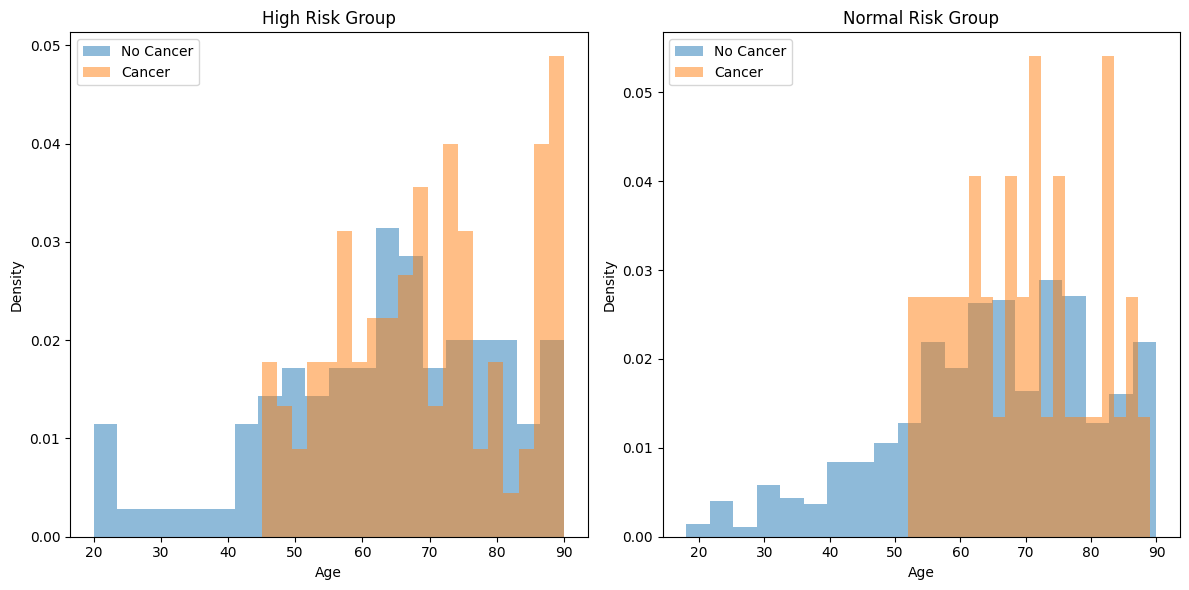

In [ ]:
from sim.patient import init_risk_population
# Test and visualize
population = init_risk_population(1000)

# Analysis
total = len(population)
high_risk = [p for p in population if p[2]]
normal_risk = [p for p in population if not p[2]]

print("Overall Population Statistics:")
print(f"Total population: {total}")
print(f"High risk patients: {len(high_risk)} ({len(high_risk)/total*100:.1f}%)")
print(f"Normal risk patients: {len(normal_risk)} ({len(normal_risk)/total*100:.1f}%)")

print("\nHigh Risk Group:")
n_cancer_high = sum(
    1 for _, has_cancer, is_high in population if is_high and has_cancer
)
print(f"Cancer cases: {n_cancer_high} ({n_cancer_high/len(high_risk)*100:.1f}%)")
high_risk_ages = [age for age, _, is_high in population if is_high]
print(f"Mean age: {np.mean(high_risk_ages):.1f}")
print(f"Median age: {np.median(high_risk_ages):.1f}")

print("\nNormal Risk Group:")
n_cancer_normal = sum(
    1 for _, has_cancer, is_high in population if not is_high and has_cancer
)
print(f"Cancer cases: {n_cancer_normal} ({n_cancer_normal/len(normal_risk)*100:.1f}%)")
normal_risk_ages = [age for age, _, is_high in population if not is_high]
print(f"Mean age: {np.mean(normal_risk_ages):.1f}")
print(f"Median age: {np.median(normal_risk_ages):.1f}")

# Compare with real distribution
ages = [age for age, _, _ in population]
cancer_ages = [age for age, has_cancer, _ in population if has_cancer]

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# High Risk Group
plt.subplot(1, 2, 1)
plt.hist(
    [age for age, cancer, is_high in population if is_high and not cancer],
    bins=20,
    alpha=0.5,
    label="No Cancer",
    density=True,
)
plt.hist(
    [age for age, cancer, is_high in population if is_high and cancer],
    bins=20,
    alpha=0.5,
    label="Cancer",
    density=True,
)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("High Risk Group")
plt.legend()

# Normal Risk Group
plt.subplot(1, 2, 2)
plt.hist(
    [age for age, cancer, is_high in population if not is_high and not cancer],
    bins=20,
    alpha=0.5,
    label="No Cancer",
    density=True,
)
plt.hist(
    [age for age, cancer, is_high in population if not is_high and cancer],
    bins=20,
    alpha=0.5,
    label="Cancer",
    density=True,
)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Normal Risk Group")
plt.legend()

plt.tight_layout()
plt.show()

In [147]:
from sim.simple import ClinicalDataGenerator

In [148]:
generator = ClinicalDataGenerator()

In [149]:
generator.generate_dataset(10)[0]

PatientTrajectory(patient_id=0, visits=[PatientVisit(visit_id=0, clinical_state=array([        nan, -0.2360644 ,         nan,         nan,         nan,
               nan,         nan,         nan,  0.7945825 ,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -0.07171674,  0.85121931,         nan,
               nan,         nan, -0.72041796,         nan,         nan,
               nan,         nan,         nan,         nan,         nan]), interventions=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), diagnoses=array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]), notes=['Pattern 3 with severity level 0.6', 'Mild presentation'], time_to_next=2), PatientVisit(visit_id=1, clinical_state=array([        nan, -0.48388114,         nan,         nan,         nan,
               nan,         nan,         nan,  1.62872284,         nan,
               nan,         nan,         nan,     